In [1]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.2 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
df_actives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-actives.smi', sep='\t', header=None)
df_actives.columns = ['SMILES', 'ID']
df_actives['category'] = 1
df_inactives = pd.read_csv('/content/drive/MyDrive/DNN/HER2/data/HER2-inactives.smi', sep='\t', header=None)
df_inactives.columns = ['SMILES', 'ID']
df_inactives['category'] = 0
df = pd.concat([df_actives, df_inactives], axis=0)
df.head()

,SMILES,ID,category
0,[O-][S+](CCO)CCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(...,CHEMBL1923015,1
1,[O-][S+]1CCN(Cc2ccc(-c3cc4c(Nc5ccc(OCc6cccc(F)...,CHEMBL3409483,1
2,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL377250,1
3,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212954,1
4,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212965,1


In [21]:
df_actives.shape

(1684, 3)

In [22]:
df_inactives.shape

(2258, 3)

In [23]:
df.shape

(3942, 3)

In [5]:
#df_inactives.head()

In [6]:
dictionary_data = dict(zip(df['ID'], df['SMILES']))

In [8]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

def generate_ecfp6_fingerprint(smiles):
    """
    Generate ECFP6 fingerprint as a bit vector for a molecule in SMILES format.

    Parameters:
    - smiles (str): SMILES representation of the molecule

    Returns:
    - fingerprint (list): List representing the bit vector of the ECFP6 fingerprint
    """
    mol = Chem.MolFromSmiles(smiles)

    if mol is not None:
        # Generate ECFP6 fingerprint
        ecfp6 = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=2048)

        # Convert the bit vector to a list of integers
        fingerprint = [int(ecfp6.GetBit(i)) for i in range(ecfp6.GetNumBits())]

        return fingerprint
    else:
        return None

# Example string with comma-separated SMILES and SMILES IDs
smiles_and_ids = "CCO,smiles_1;CCN,smiles_2;CCOc1ccccc1,smiles_3"

# Split the input string into individual SMILES and SMILES IDs
smiles_data = [tuple(pair.split(',')) for pair in smiles_and_ids.split(';')]

# Generate fingerprints for each SMILES in the list
fingerprints_data = [(smiles_id, generate_ecfp6_fingerprint(smiles)) for smiles_id, smiles in list(dictionary_data.items())]

# Create a DataFrame with column names
column_names = [f'ecfp_{i+1}' for i in range(2048)]  # Adjust the number based on your fingerprint size
df_FP = pd.DataFrame([{"ID": smiles_id, **dict(zip(column_names, fingerprint))} for smiles_id, fingerprint in fingerprints_data])

# Display the DataFrame
print(df_FP.head())


              ID  ecfp_1  ecfp_2  ecfp_3  ecfp_4  ecfp_5  ecfp_6  ecfp_7  \
0  CHEMBL1923015       0       0       0       0       0       0       0   
1  CHEMBL3409483       0       0       0       0       0       0       0   
2   CHEMBL377250       0       0       0       0       0       0       0   
3   CHEMBL212954       0       0       0       0       0       0       0   
4   CHEMBL212965       0       0       0       0       0       0       0   

   ecfp_8  ecfp_9  ...  ecfp_2039  ecfp_2040  ecfp_2041  ecfp_2042  ecfp_2043  \
0       0       0  ...          0          0          0          0          0   
1       0       0  ...          0          0          0          0          0   
2       0       0  ...          0          0          0          0          0   
3       0       0  ...          0          0          0          0          0   
4       0       0  ...          0          0          0          0          1   

   ecfp_2044  ecfp_2045  ecfp_2046  ecfp_2047  ecfp_2048

In [9]:
df_all = pd.merge(df, df_FP, on='ID')
df_all.head()

,SMILES,ID,category,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
0,[O-][S+](CCO)CCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(...,CHEMBL1923015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[O-][S+]1CCN(Cc2ccc(-c3cc4c(Nc5ccc(OCc6cccc(F)...,CHEMBL3409483,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL377250,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212954,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,[O-][S+]1CCN(Cc2ccc(-c3ccc4ncnc(Nc5ccc(OCc6ccc...,CHEMBL212965,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# Randomizing the dataset
df_all = df_all.sample(frac=1).reset_index(drop=True)
df_all.head()

,SMILES,ID,category,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,...,ecfp_2039,ecfp_2040,ecfp_2041,ecfp_2042,ecfp_2043,ecfp_2044,ecfp_2045,ecfp_2046,ecfp_2047,ecfp_2048
0,CO/N=C/c1c(N)ncnc1Nc1ccc2c(cnn2Cc2cccc(OC)c2)c1,CHEMBL403357,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Cc1ccc(S(=O)(=O)NC(=O)NN2CC3CCCC3C2)cc1,CHEMBL427216,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C1CSC(N2N=C(c3ccc(F)cc3)CC2c2ccccc2)=N1,CHEMBL1958025,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C[C@H]1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)...,CHEMBL33,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,CNc1ccc2ncnc(Nc3cccc(Cl)c3)c2c1,CHEMBL209343,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df_all.drop(['ID', 'SMILES', 'category'], axis=1).values
y = df_all['category'].values

##Train-Test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##Deep Learning Model building

In [13]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_dim=X.shape[1])) #input_shape=(X.shape[1],)
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])   #optimizer='rmsprop', 'SGD', 'adam'

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 557569 (2.13 MB)
Trainable params: 557569 (2.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


##Model training

In [15]:
history = model.fit(X_train, y_train, batch_size=8, epochs=300, verbose=1, validation_split=0.2)

Epoch 1/300
296/296 [==============================] - 6s 14ms/step - loss: 1.3250 - acc: 0.8426 - val_loss: 0.5255 - val_acc: 0.8818
Epoch 2/300
296/296 [==============================] - 4s 14ms/step - loss: 0.5124 - acc: 0.8769 - val_loss: 0.4820 - val_acc: 0.8733
Epoch 3/300
296/296 [==============================] - 5s 17ms/step - loss: 0.4714 - acc: 0.8786 - val_loss: 0.4529 - val_acc: 0.8716
Epoch 4/300
296/296 [==============================] - 6s 19ms/step - loss: 0.4504 - acc: 0.8794 - val_loss: 0.4184 - val_acc: 0.8986
Epoch 5/300
296/296 [==============================] - 4s 13ms/step - loss: 0.4305 - acc: 0.8896 - val_loss: 0.4157 - val_acc: 0.8801
Epoch 6/300
296/296 [==============================] - 3s 9ms/step - loss: 0.4297 - acc: 0.8816 - val_loss: 0.4279 - val_acc: 0.8818
Epoch 7/300
296/296 [==============================] - 3s 10ms/step - loss: 0.4196 - acc: 0.8947 - val_loss: 0.4193 - val_acc: 0.8902
Epoch 8/300
296/296 [==============================] - 4s 14ms/

##Plot the loss curve


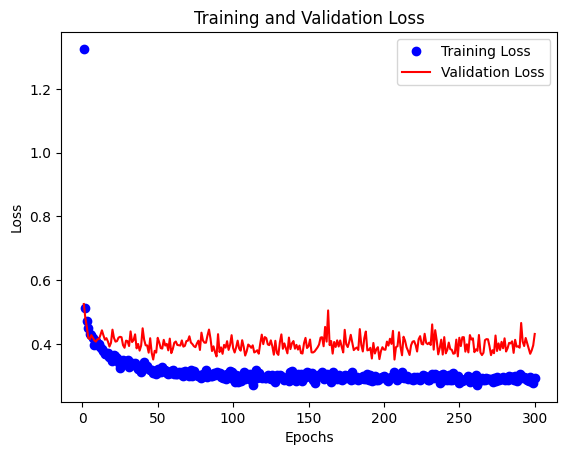

In [16]:
from matplotlib import pyplot as plt
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.show()

##Evaluate the model

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

predictions = model.predict(X_test)
threshold = 0.5
y_pred_class = np.where(predictions >= threshold, 1, 0)
#predicted_classes = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, y_pred_class)
#accuracy = accuracy_score(y_test, predicted_classes)
print("Test Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred_class)
print(cm)

31/31 [==============================] - 0s 3ms/step - loss: 0.4418 - acc: 0.8854
Test Score: 0.4417930841445923
Test Accuracy: 0.8853955268859863
31/31 [==============================] - 0s 4ms/step
Test Accuracy: 0.8853955375253549
[[514  53]
 [ 60 359]]


##Hyper parameters tuning using grid search

In [18]:
!pip install scikeras

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [20]:
# Define the function to create the Keras model
def create_model(optimizer='adam', units=32, activation = 'relu'):
    model = Sequential()
    model.add(Dense(units=units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use with scikit-learn
model = KerasClassifier(build_fn=create_model, units= 32, activation= 'relu', epochs=10, batch_size=32, verbose=0)

# Define hyperparameters and possible values for GridSearchCV
param_grid = {
    'optimizer': ['SGD', 'adam', 'rmsprop'],
    'units': [32, 64, 128],
    'activation': ['relu', 'leaky_relu', 'tanh']

}
#'LeakyReLU' or 'leaky_relu'
# 'ReLU'or 'relu'
# Perform GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Get the best model
best_model = grid_result.best_estimator_

# Evaluate the model on the test set
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: %.2f%%" % (accuracy * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

Best: 0.888699 using {'activation': 'relu', 'optimizer': 'SGD', 'units': 128}
Test Accuracy: 89.25%
